<a href="https://colab.research.google.com/github/JinLeeGG/Python_CodingTest/blob/main/(Round2-Day06)%20DFS%2C%20BFS/CodingExample/BFS%2C_DFS_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. https://school.programmers.co.kr/learn/courses/30/lessons/150365

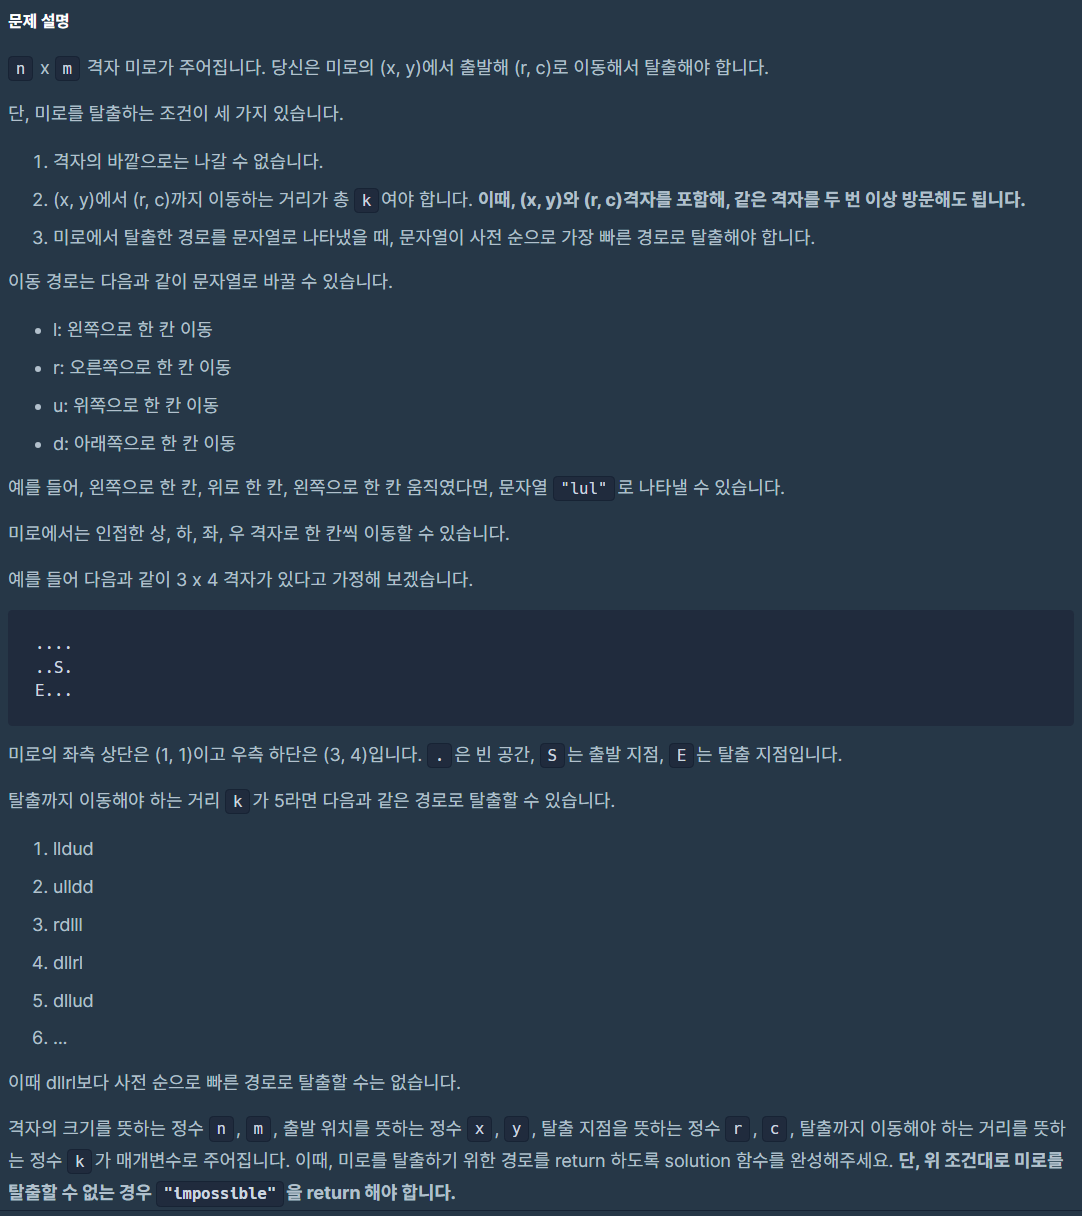

In [ ]:
# My Answer
'''
n * m  = grid
x, y = start
r, c = end
k = total steps
'''

def solution(n, m, x, y, r, c, k):
    # 모든 가능한 경로를 저장해줄 리스트
    pathlist = []

    def dfs(current_x, current_y, count, current_path_str):
        # k 걸음을 다 채웠을 경우
        if count == k:
            # r,c 도착지점에 있는지 확인
            if current_x == r-1 and current_y == c-1:
                # 도착지점에 있으면 경로를 리스트에 추가
                pathlist.append(current_path_str)
            # 도착을 못했으면 빠져나오기
            return

        # (direction_string, x, y)
        # 다운 -> x + 1
        # 업 -> x - 1
        # 왼 -> y - 1
        # 오 -> y + 1
        directions = [('d', 1, 0), ('u', -1, 0), ('l', 0, -1), ('r', 0, 1)]

        # 다음 x, y값을 업데이트
        for direction_string, nx, ny in directions:
            next_x = current_x + nx  # 다음x값 = 지금x값 + 방향값
            next_y = current_y + ny  # 다음y값 = 지금y값 + 방향값

            # 다음 x, y 값이 n*m 안에 있는지 체크
            if 0 <= next_x < n and 0 <= next_y < m:
                # 있는경우 dfs 함수 실행
                # 걸음수(count) 1 증가, 방향 문자열 추가
                dfs(next_x, next_y, count + 1, current_path_str + direction_string)

    # 출발지점 x, y, 걸음은 0, 문자열은 아무것도 없는 상태로 시작
    dfs(x-1, y-1, 0, "")


    if not pathlist:
        # 만약 pathlist안에 아무것도 없다면 k 걸음안에 도착지점에 가는게 불가능
        return "impossible"
    else:
        pathlist.sort() # alphabetical order로 정렬
        return pathlist[0] # 제일 빠른 경로를 반환

solution(3, 4, 2, 3, 3, 1, 5)

'dllrl'

In [3]:
# Top Answer
n,m,x,y,r,c,k = map(int,input().split())

dx = [-1,0,0,1]
dy = [0,1,-1,0]
move = ['u','r','l','d']
# 배치를 일부로 이렇게 한 것,
# 만약 bfs 형태에서 사용한다면 반대인 d l r u 순서로 배치했을 것
# 알파벳 순서로 하면 d l r u 순서로 나타나게 되는데
# 경로를 알파벳 순으로 정렬했을때 가장 빠른 것으로 해야되는데
# bfs로 하게 되면 d l r u 로 들어있는 큐에서
# d l r u를 다 지나고 나서 d를 다시 들어가게 되므로
# ddd 이런식으로 가야되면 알파벳 순이 매우 앞인데도 불구하고
# 많이 돌아가야 하는 문제가 발생함 -> dfs로 변경한 이유


# 처음에는 안 쓰려 했는데 없으면 시간 초과...
# 거리 함수중에 이런 식의 사각으로만 이동할 때 사용하는 함수
def distance(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

def solution(n, m, x, y, r, c, k):
    answer = 'impossible'
    stack = [(x,y,[])]       # dfs기에 stack으로 정의
    # 맨 뒤의 []는 이동 경로가 들어감, ''로 하고 ''+'u' 형태로 추가해도 좋음

    while stack:
        x1,y1,arr = stack.pop()
        num = len(arr)  # 현재까지 이동한 횟수
        # (arr = 이동 경로) 이기에 k번 이동했으면 결과를 확인하라는 것
        if len(arr) == k and x1 == r and y1 == c:
            return ''.join(arr)   # 리스트를 문자열로 합치는 메소드 자주 사용함
        for i in range(4):  # 방향이 4개라서
            nx = x1 + dx[i]
            ny = y1 + dy[i]
            nm = move[i]
            # 이동한 방향이 인덱스를 벗어나지 않아야만 로직을 진행
            if nx > 0 and nx <= n and ny > 0 and ny <= m:
                d = distance(nx,ny,r,c)    # 이동한 위치와 도착 위치까지 거리 확인
                rest_move = k - (num + 1)
                # (num = (x1,y1)까지 이동 횟수) 이기에 nx,ny 기준에서는 + 1
                # 그러면 남은 이동 횟수는 k - (num + 1)

                # 남은 거리(d)가 남은 이동 횟수(rest_move)보다는 적어야 함
                # 정확히 도착하려면 사실 같아야 하는게 맞은데
                # 한번 갔던 곳을 다시 가도 되는 것 때문에
                # 왔다 갔다 해서 다시 돌아오는 것 까지 세줘야 함
                # 그러면 정확히 같다가 아니라 2의 배수 차이 까지는 괜찮음 (이거 없으니 시간 초과...)
                if d <= rest_move and (d - rest_move) % 2 == 0:
                    stack.append((nx,ny,arr+[nm]))
    return answer

print((solution(n,m,x,y,r,c,k)))

3 4 2 3 3 1 5
dllrl


#2. https://www.acmicpc.net/problem/14502
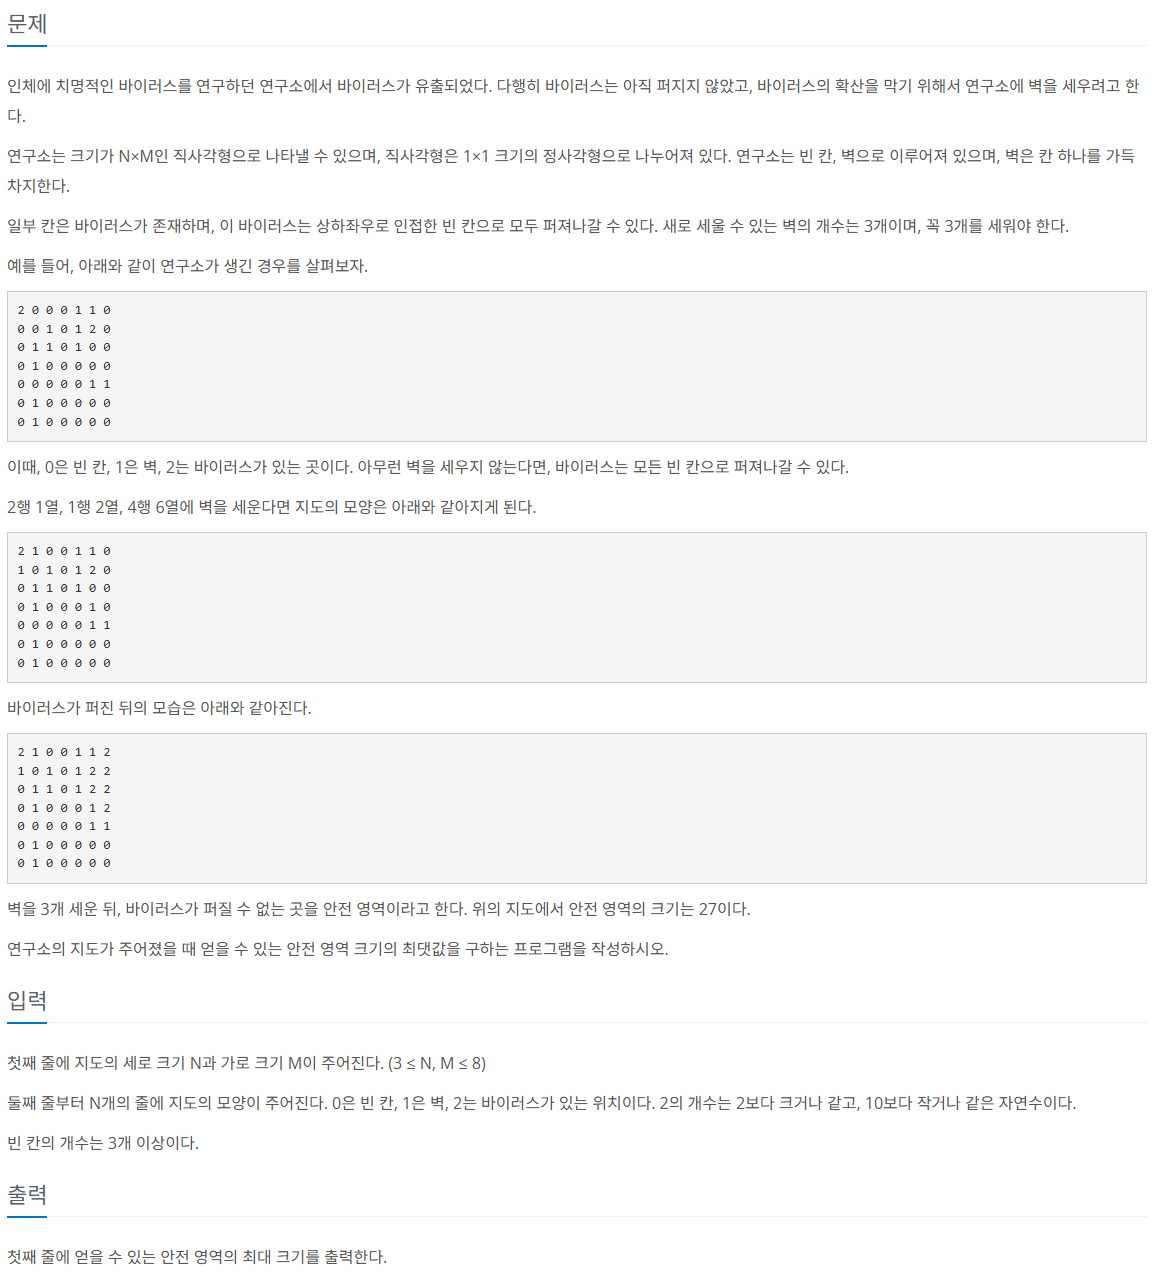

In [4]:
# 2
from itertools import combinations
from copy import deepcopy
from collections import deque

n,m = map(int,input().split())
graph = [list(map(int,input().split())) for _ in range(n)]
dx = [-1,1,0,0]
dy = [0,0,-1,1]


def bfs(graph,start,n,m):
    queue = deque([start])
    # 바이러스 시작 위치가 start이기에 start에서의 값은 2
    # 그 주변에 0이 있으면 0을 2로 바꾸면 됨

    while queue:
        x, y = queue.popleft()
        for i in range(4): # 이동할 수 있는 방향이 4개 이기에
            nx = x + dx[i]
            ny = y + dy[i]

            # 이동한 방향이 인덱스를 넘지 않았고
            # 이동한 곳의 값이 0이면 바이러스가 확산될 것이니 2로 바꾸고
            # 그 위치에서 다시 바이러스를 확산(queue에 넣어서 이 다음에 확산) 시키는 코드
            if nx >= 0 and nx < n and ny >= 0 and ny < m and graph[nx][ny] == 0:
                graph[nx][ny] = 2
                queue.append((nx,ny))


def virus_go(graph,virus,n,m):
    # 바이러스 위치들을 알고 있으니
    # 각 바이러스 위치에서 bfs를 통해 바이러스를 확산시킴
    for i, j in virus:
        bfs(graph,(i,j),n,m)

    # 남은 안전 지역의 수 확인
    sum = 0
    for i in range(n):
        for j in range(m):
            if graph[i][j] == 0:
                sum += 1
    return sum


def solution(graph,n,m):
    avail = []
    virus = []
    answer = 0

    # 벽을 세우려면 어디를 세울 수 있는지 부터 확인해야 하기에
    # 전체를 다 돌기는 해야하는데, 어짜피 전체를 돌 것이기에
    # 돌면서 virus 위치도 같이 세어주는게 좋음
    # 0은 벽을 새로 새울 수 있음, 2는 바이러스가 퍼짐 이라는
    # 특이한 로직이 가능한 애들이고 1은 그러지는 않아서
    # 이미 세워진 벽인 1은 굳이 안 모아줘도 괜찮음
    for i in range(n):
        for j in range(m):
            if graph[i][j] == 0:
                avail.append((i,j))
            elif graph[i][j] == 2:
                virus.append((i,j))

    # 생각보다 많이 사용하는 함수, combinations(리스트,갯수)
    # 리스트에서 순서 고려하지 않고 갯수 만큼 뽑아내는
    # 모든 경우의 수를 리턴해 주는 함수
    for wall in combinations(avail,3):
        new_graph = deepcopy(graph)
        # 그래프를 줘야 하는데 벽이 새로 세워진 그래프가 들어가야 하는데
        # 매번 세워지는 벽에 따라 그래프가 달라지고 (원본을 기억해야 하고)
        # 원본으로 다시 되돌리는 (=백트래킹)을 해도 되지만
        # 벽 3개를 되돌리는 것 보다 원본을 기억하는게 낫다고 판단
        # 2차원 리스트기에 graph[:] 로 복사했다가는 내부 리스트는 그대로 복사됨 (얕은 복사)
        # 즉, graph[:]를 사용하면 사실상 원래 그래프 조차도 변형됨 -> 깊은 복사를 해야함
        for i,j in wall:
            new_graph[i][j] = 1
        result = virus_go(new_graph,virus,n,m)

        # 결과로 나온 안전 지역의 수가 이전까지의 안전 지역의 수 보다 많으면
        # 그 결과로 기억하고 있어라
        if result > answer:
            answer = result
    return answer

if __name__ == "__main__":
    print(solution(graph,n,m))

In [5]:
from itertools import combinations
from collections import deque
import copy
def bfs(N, M, x, y, map_):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)] # 상하좌우 이동방향 정보
    queue = deque([(x, y)]) # 처음 좌표를 초기값으로 설정

    while queue: # 큐 내부에 요소가 있으면 시행
        current = queue.popleft() # 큐 제일 왼쪽 요소를 빼서 현재 좌표

        for d in directions: # (1, 0), (-1, 0), (0, 1), (0, -1)
            new_x = current[0] + d[0]
            new_y = current[1] + d[1]
            if 0 <= new_x < N and 0 <= new_y < M: # 인데스 범위를 검사
                if map_[new_x][new_y] == '0': # 0인지 확인
                    queue.append((new_x, new_y))
                    map_[new_x][new_y] = '2'

N, M = map(int, input().split())
map_ = []
zero = [] # 이동가능한 공간 좌표를 저장하는 리스트
virus = [] # 바이러스들 좌표를 저장하는 리스트
max_safe = 0 # 최대값을 저장하는 변수
for i in range(N):
    line = list(input().split())
    map_.append(line) # 한 행을 map_에 삽입
    for j, num in enumerate(line): # 열거형 함수
        if num == '0': # 0 이면 이동가능한 좌표를 저장하는 리스트에 삽입
            zero.append((i, j))
        if num == '2': # 2이면 바이러스 좌표를 저장하는 리스트에 삽입
            virus.append((i, j))

for walls in combinations(zero, 3): # 조합가능한 조합을 walls에 담아줌
    safe = 0 # 시행이 끝나고 남아있는 0의 개수
    copied_map = copy.deepcopy(map_) #[:]얕으복사 대신 깊은 복사를 사용하기 위한 모듈
    for wall in walls:
        copied_map[wall[0]][wall[1]] = '1' # 0 -> 1로 바꿔주는 코드
    for v in virus:
        bfs(N, M, v[0], v[1], copied_map) # 모든 바이러스가 전염을 마친 상태
    for i in copied_map: # 남은 0의 개수를 새준다
        safe += i.count('0')
    max_safe = max(max_safe, safe) # 이전까지의 최대값과 현재값을 비교하여 갱신
print(max_safe) # 모든 조합, 시행에 대한 최대값

7 7 
2 0 0 0 1 1 0
0 0 1 0 1 2 0
0 1 1 0 1 0 0
0 1 0 0 0 0 0
0 0 0 0 0 1 1
0 1 0 0 0 0 0
0 1 0 0 0 0 0
27


#3. https://www.acmicpc.net/problem/18405

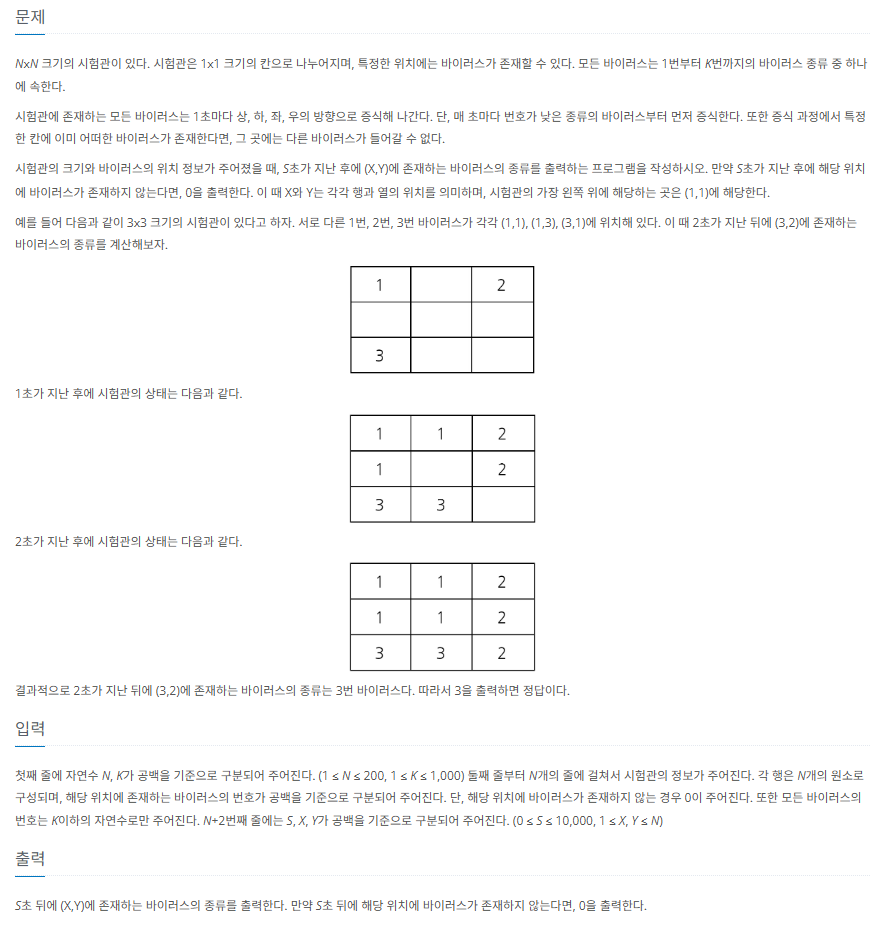

In [ ]:
# My answer
def solution(N, K, S, X, Y, board):
    result = 0
    visited = [[False for _ in range(N)] for _ in range(K)]
    numSet = set()

    for i in range(N):
        for j in range(K):
            if board[i][j] != 0:
              numSet.add(board[i][j])

    numSet = list(numSet)

    for i in range(N):
        for j in range(K):
            virusSpread(numSet, i, j, N, K, board, S)

    print(board)
    return board[X-1][Y-1]


def virusSpread(virusNumList, r, c, N, K, board, S):
    for i in range(S):
      for i in range(0, len(virusNumList)):
        # if out of boundary
        if r < 0 or r >= N or c < 0 or c >= N:
            return
        # if already filled with another virus
        if board[r][c] != 0:
            return

        board[r][c] = virusNumList[i]

        # 상하좌우
        virusSpread(virusNumList, r+1, c, N, K, board, S)
        virusSpread(virusNumList, r-1, c, N, K, board, S)
        virusSpread(virusNumList, r, c+1, N, K, board, S)
        virusSpread(virusNumList, r, c-1, N, K, board, S)

board = [
    [1, 0, 2],
    [0, 0, 0],
    [3, 0, 0]
    ]

solution(3, 3, 2, 3, 2, board)

[[1, 1, 2], [1, 1, 1], [3, 1, 1]]


1

In [ ]:
# 3
from collections import deque
N, K = map(int,input().split())
graph = [list(map(int,input().split())) for _ in range(N)] # int로 형변환하면 속도가 1.2~2배 이상 차이난다
S, X, Y = map(int,input().split())

dx = [-1,1,0,0]
dy = [0,0,-1,1]

def solution(graph,N,K,S,X,Y):
    virus = []  # 바이러스 위치들을 모아놓을 리스트

    for i in range(N):
        for j in range(N):
            node = graph[i][j]
            if node != 0:  # 0이면 바이러스가 없다는 것이기에
                virus.append((node,(i,j),0))  # 바이러스의 값, 위치, 이동 시간(S초 확인 때문에)

    # 바이러스 값이 작은 것 부터 순서대로 하기에 들어온 순서대로 하는 queue를 사용
    virus.sort(key=lambda x : x[0])  # 바이러스의 값이 작은 것 부터 확산을 시키기에 정렬
    queue = deque(virus) # 바이러스 값이 적은 것 부터 queue에 들어있게 됨

    while queue:
        node, (x, y), time = queue.popleft()

        if time >= S:  # S초 까지만 확인하면 되기에
            # 이걸 위해서 virus 리스트랑 queue에 시간까지 넣은 것이고
            # bfs기에 0초 부터 순서대로 쌓여가서 S초가 한 번 이라도 나오는 순간 끝내면 됨
            # dfs면 초가 순서대로 안 나오기에 확인 로직이 어려울 수 있음
            break

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if nx >= 0 and nx < N and ny >= 0 and ny < N and graph[nx][ny] == 0:
                graph[nx][ny] = node
                queue.append((node,(nx,ny),time+1))
    return graph[X][Y]

if __name__ == "__main__":
    print(solution(graph,N,K,S,X-1,Y-1))

In [ ]:
# Answer 2
N, K = map(int, input().split())
map_ = []
virus = []
for i in range(N):
    line = list(map(int, input().split()))
    map_.append(line)
    for j, num in enumerate(line):
        if num != 0:
            virus.append((i+1, j+1, num))

S, X, Y = map(int, input().split())

virus_num = 0
min_distance = 1000
for v in virus:
    distance = abs(X - v[0]) + abs(Y - v[1])
    if distance <= S:
        if distance < min_distance:
            min_distance = distance
            virus_num = v[2]
        elif distance == min_distance:
            virus_num = min(virus_num, v[2])
print(virus_num)

https://www.acmicpc.net/problem/18352
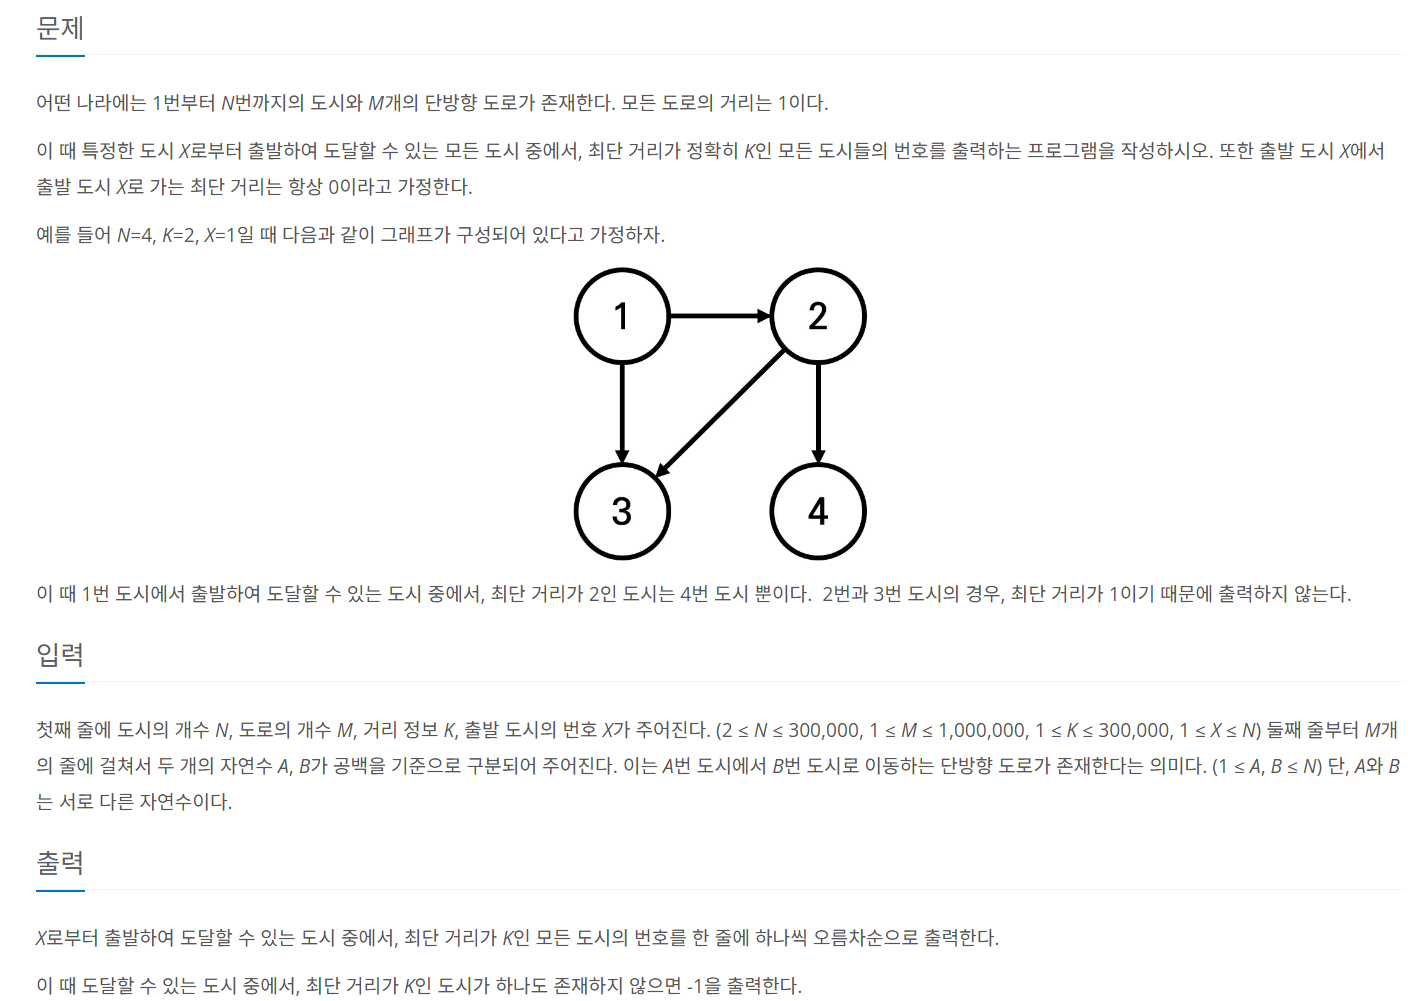

In [25]:
# My attempt 1
tree = [
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4)
]

nextDirectNode = []
all_possibleNode = []

def solution(N, M, K, X):
  for i in range(len(tree)):
    if tree[i][0] == X:
      top = tree.pop()
      nextDirectNode.append(top)

    for i in range(len(nextDirectNode)):
      if nextDirectNode[i][1] == tree[i][0]:
        all_possibleNode.append(nextDirectNode[i] + tree[i])

solution(4, 4, 2, 1)
print(all_possibleNode)

IndexError: list index out of range

# BFS/DFS
##최단 거리를 구하는 경우
* BFS/DFS 중 하나를 선택해서 코드를 작성할 때 노드와 노드의 가중치 값이 모두 같은 값을 가지고 있다면 볼것도 없이 BFS로 해결



In [ ]:
# Answer
from collections import deque

# 입력값 받기
n, m, k, x = map(int, input().split())

graph = [[] for _ in range(n + 1)]

for _ in range(m):
  a, b = map(int, input.split())
  graph[a].append(b)

  distance = [-1] * (n + 1)
  distance[x] = 0

  #################
  # 핵심
  q = deque([x])
  while q:
      now = q.popleft()

      for next_node in graph[now]:
          if distance[next_node] == -1:
              distance[next_node] = distance[now] + 1
              q.append(next_node)

  #################

  check = False

  for i in range(1, n + 1):
      if distance[i] == k:
          print(i)
          check = True

  if check == False
      print(-1)

In [ ]:
from collections import deque
def bfs(start, city, K, result):
    visited = [False] * len(city)
    queue = deque([(start, 0)]) # (위치, 거리)
    visited[start - 1] = True
    while queue:
        current = queue.popleft()
        if current[1] == K:
          result.append(current[0])

        if current[1] > K:
          break

        for next_city in city[current[0] - 1]:
            if not visited[next_city - 1]:
                queue.append((next_city, current[1] + 1))
                visited[next_city - 1] = True
    return result
    N, M, K, X = map(int, input().split())
    city = [[] for _ in range(N)]
    for i in range(M):
        src, dst = map(int, input().split())
          city[src - 1].append(dst)
        city[dst - 1].append(src)
    result = sorted(bfs(X, city, K, []))
    if result:
        for r in result:
        print(r)
    else:
        print(-1)